# Capstone
## Machine Learning Engineer Nanodegree
## Data Exploration&Preprocessing

### variables
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
<br>
X2: Gender (1 = male; 2 = female). 
<br>
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
<br>
X4: Marital status (1 = married; 2 = single; 3 = others). 
<br>
X5: Age (year). 
<br>
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
<br>
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
<br>
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.
<br>
default payment next month: 1 stands for the customer who will conduct default payment next month.0 stands for customer who will not conduct default payment next month.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load the 'default of credit card cliendts' data
data = pd.read_excel('default of credit card clients.xls',header = 1)

In [3]:
# check the data imblancement
class0 = sum(data['default payment next month'] == 0)
class1 = sum(data['default payment next month'] == 1)
print 'We have {} customers who are not default and {} customers who are not default'.format(class0,class1)

We have 23364 customers who are not default and 6636 customers who are not default


In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


From above, we get a basic understanding of our dataset:
<br>
- 24 features(contains ID) and 1 response variable consist of class '0' and class '1'.
<br>
- The two classes are not balanced. The number of instances belong to class '0' is almost four times as that belong to class'1'. We should deal with it later.

In [4]:
# drop label 0,1 and get raw features
features_raw = data.drop('default payment next month',axis = 1)

In [5]:
# check features
features_raw.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [6]:
features_raw.shape

(30000, 24)

In [7]:
# observe summary statistics
features_raw.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


### Visualization of distribution of each feature
Check the skewness

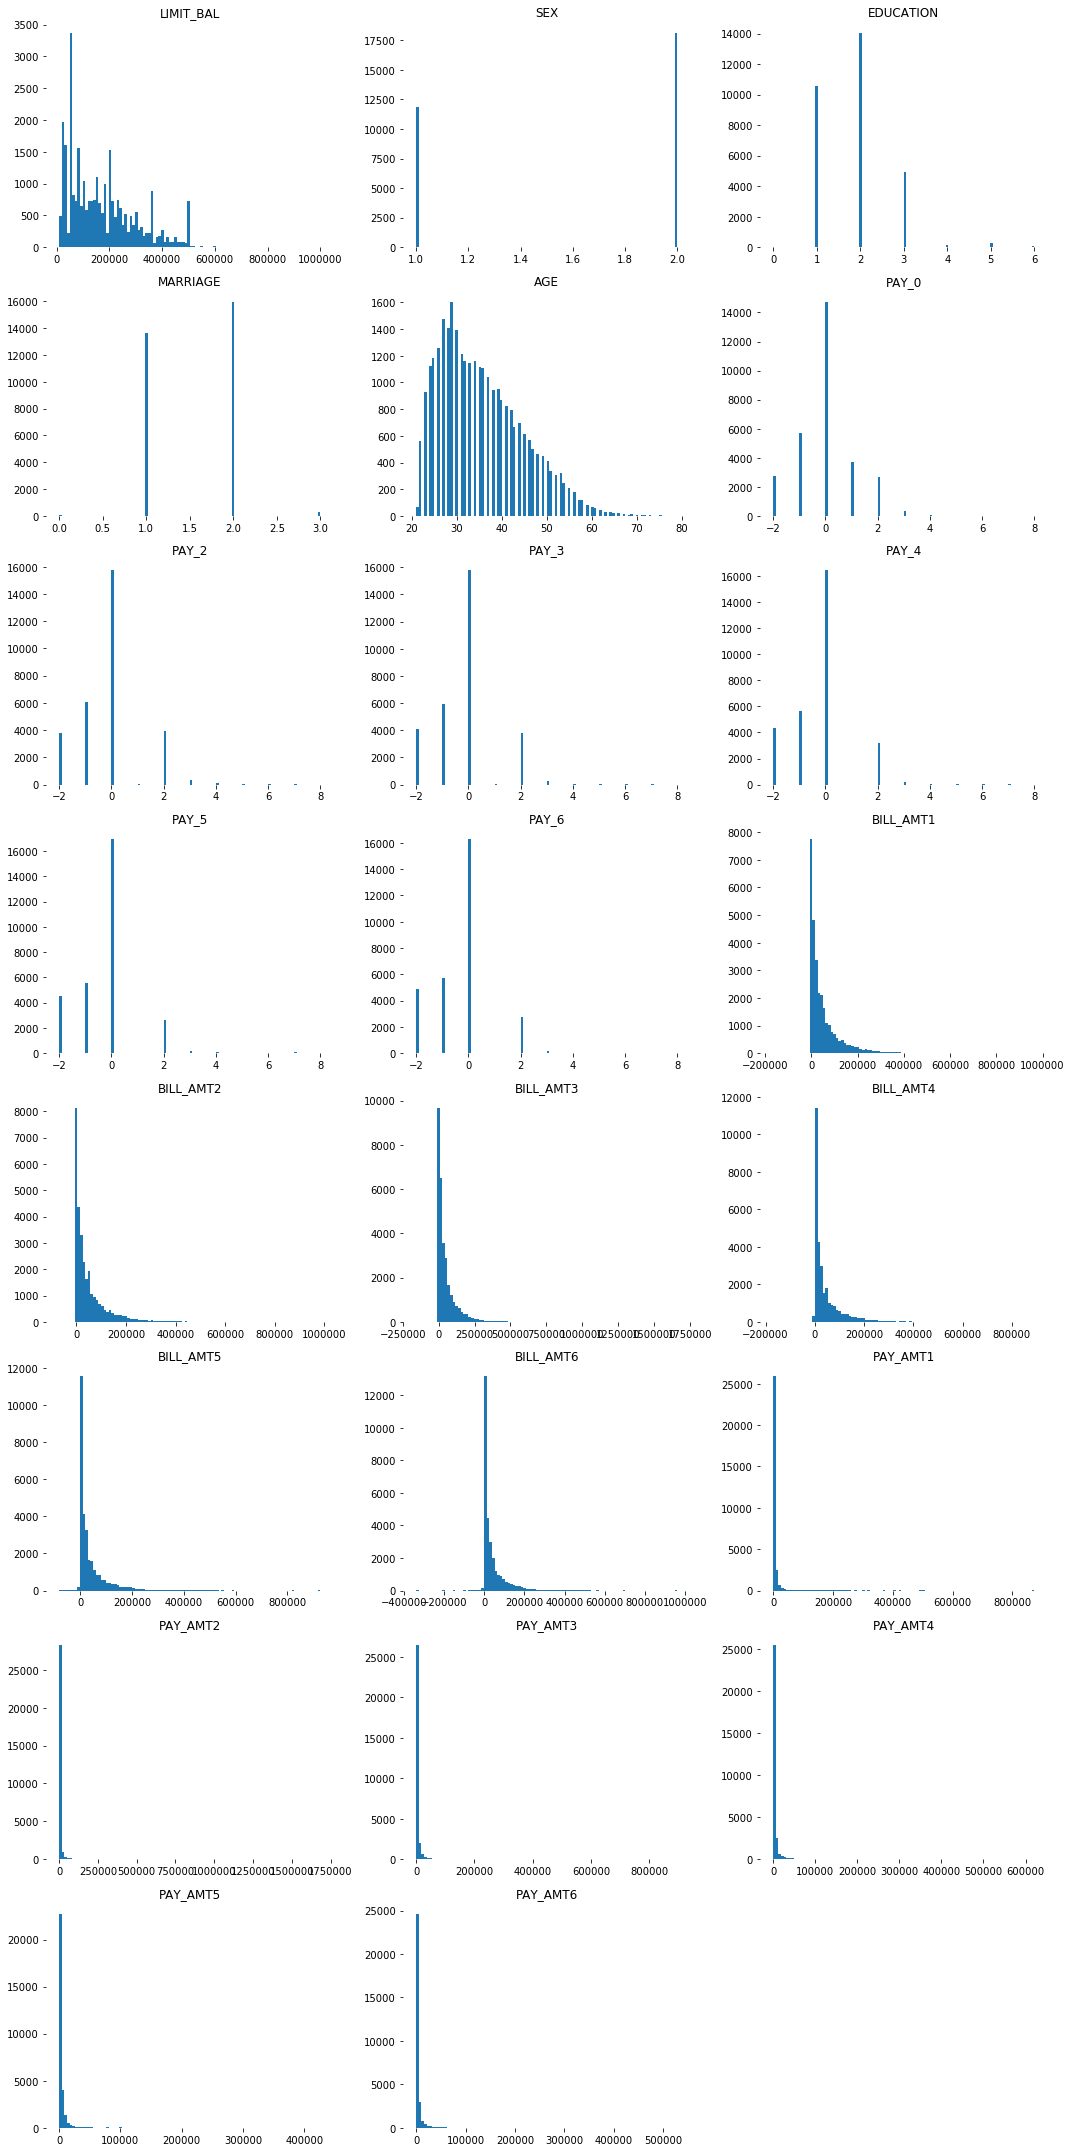

In [12]:
# visualization
# plot histograms to view the distribution/skewness of each feature
feature_name = features_raw.columns.tolist()
feature_name.remove('ID')
# check the distribution/skewness of features
fig = plt.figure(figsize = (15,30))
for i,name in enumerate(feature_name):
    ax = fig.add_subplot(8,3,i+1)
    ax.hist(features_raw[name],bins = 100)
    ax.set_title(name)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
fig.tight_layout()
plt.savefig('distribution.PNG')
plt.show()

### Log Transformation
#### I decided to do log transformation first. The reason is that I want to feed the models with imbalanced data(which preprocessed with log transformation too) and balanced data to compare the performance. 
From the plot above, we found these features are left-skewed:
<br>
'LIMIT_BAL', 'AGE','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'
<br>
Thus, we need to perform log transformation on them.
Noticed that the min of some features I want to transform is 0, in order to conduct log transformation, I add 1 to each point since their ranges are abroad.

In [13]:
# because the min of some of features I want to transform is 0, I add 1 to each point since their ranges are abroad.
features_replace = features_raw.loc[:,'PAY_AMT1':'PAY_AMT6'].apply(lambda x : x+1)
features_raw.loc[:,'PAY_AMT1':'PAY_AMT6'] = features_replace.loc[:,'PAY_AMT1':'PAY_AMT6']

In [14]:
# Log-transform the skewed features
skewed = ['LIMIT_BAL', 'AGE','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
features_trs = pd.DataFrame()
features_trs[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
# clean nan and inf
#features_trs = features_trs.replace(0,np.nan).dropna()
#features_trs = features_trs.replace([np.inf, -np.inf], np.nan).dropna()

In [15]:
# replace original feature with transformed feature
features_raw[skewed] = features_trs[skewed] 

In [16]:
features_raw.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,9.903538,2,2,1,3.218876,2,2,-1,-1,...,689,0,0,0,0.693147,6.538140,0.693147,0.693147,0.693147,0.693147
1,2,11.695255,2,2,2,3.295837,-1,2,0,0,...,2682,3272,3455,3261,0.693147,6.909753,6.909753,6.909753,0.693147,7.601902
2,3,11.407576,2,2,2,3.555348,0,0,0,0,...,13559,14331,14948,15549,7.326466,7.314553,6.909753,6.909753,6.909753,8.517593
3,4,10.819798,2,2,1,3.637586,0,0,0,0,...,49291,28314,28959,29547,7.601902,7.611348,7.091742,7.004882,6.976348,6.909753
4,5,10.819798,1,2,1,4.060443,-1,0,-1,0,...,35835,20940,19146,19131,7.601902,10.510069,9.210540,9.105202,6.538140,6.523562


In [17]:
# features after preprocessing
features_pre = pd.concat([features_raw,data['default payment next month']],axis = 1)

In [18]:
features_pre.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,9.903538,2,2,1,3.218876,2,2,-1,-1,...,0,0,0,0.693147,6.538140,0.693147,0.693147,0.693147,0.693147,1
1,2,11.695255,2,2,2,3.295837,-1,2,0,0,...,3272,3455,3261,0.693147,6.909753,6.909753,6.909753,0.693147,7.601902,1
2,3,11.407576,2,2,2,3.555348,0,0,0,0,...,14331,14948,15549,7.326466,7.314553,6.909753,6.909753,6.909753,8.517593,0
3,4,10.819798,2,2,1,3.637586,0,0,0,0,...,28314,28959,29547,7.601902,7.611348,7.091742,7.004882,6.976348,6.909753,0
4,5,10.819798,1,2,1,4.060443,-1,0,-1,0,...,20940,19146,19131,7.601902,10.510069,9.210540,9.105202,6.538140,6.523562,0


In [28]:
# save preprocessed feature to csv file
features_pre.to_csv('C:/Users/youch/Desktop/september_jmx/credit_default_pre.csv')

### Visualization of distribution of each feature after transformation

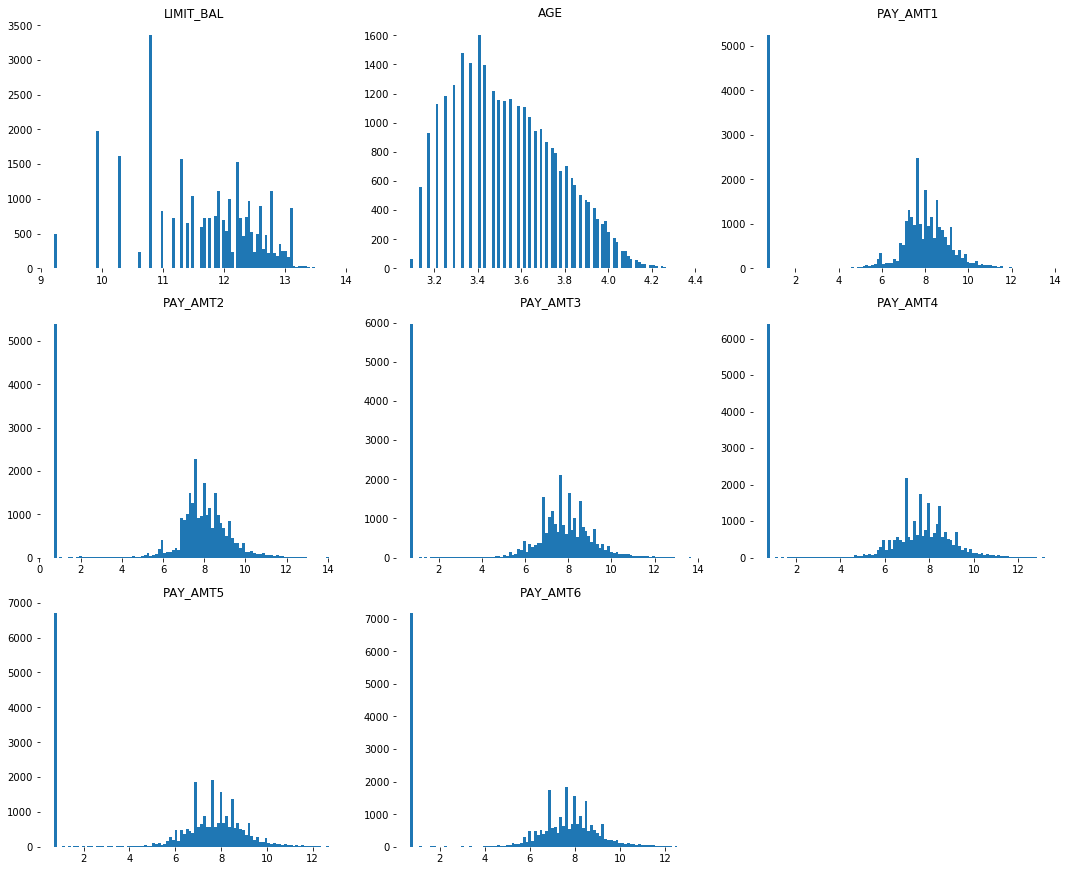

In [19]:
# check the distribution of transformed data
# plotting transformed features
fig = plt.figure(figsize = (15,20))
for i,name in enumerate(skewed):
    ax = fig.add_subplot(5,3,i+1)
    ax.hist(features_trs[name],bins = 100)
    ax.set_title(name)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

fig.tight_layout()
plt.savefig('transformed.PNG')
plt.show()

## Feature scaling

In [2]:
import pandas as pd

In [65]:
data = pd.read_csv('C:/Users/youch/Desktop/september_jmx/credit_default_pre.csv')

In [66]:
data.tail()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29995,29996,12.301387,1,3,1,3.688879,0,0,0,...,88004,31237,15980,9.048057,9.903588,8.518193,8.022569,8.517593,6.909753,0
29996,29996,29997,11.918397,1,3,2,3.784190,-1,-1,-1,...,8979,5190,0,7.516977,8.168486,9.104980,4.875197,0.693147,0.693147,0
29997,29997,29998,10.308986,1,2,2,3.637586,4,3,2,...,20878,20582,19357,0.693147,0.693147,9.998889,8.343316,7.601902,8.039802,1
29998,29998,29999,11.289794,1,3,1,3.737670,1,-1,0,...,52774,11855,48944,11.360962,8.134761,7.073270,7.564238,10.877405,7.498870,1
29999,29999,30000,10.819798,1,2,1,3.850148,0,0,0,...,36535,32428,15313,7.640123,7.496652,7.266827,6.909753,6.909753,6.909753,1


In [67]:
numerical = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [68]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
data[numerical] = scaler.fit_transform(data[numerical])

In [70]:
# in order to convert these catergorical variables to dummy variables, I firstly converted them to strings.
data['SEX'] = [str(x) for x in data['SEX']]
data['EDUCATION'] = [str(x) for x in data['EDUCATION']]
data['MARRIAGE'] = [str(x) for x in data['MARRIAGE']]

In [73]:
data = pd.get_dummies(data)
data = data.drop('Unnamed: 0',axis = 1)
data = data.set_index('ID')

In [74]:
data.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
ID,,,,,,,,,,,,,,,,,,,,,
1,0.150507,0.099020,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,0.069164,...,0,1,0,0,0,0,0,1,0,0
2,0.539582,0.158634,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,0.067858,...,0,1,0,0,0,0,0,0,1,0
3,0.477112,0.359652,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,0.079532,...,0,1,0,0,0,0,0,0,1,0
4,0.349475,0.423354,0.2,0.2,0.2,0.2,0.2,0.2,0.188100,0.111995,...,0,1,0,0,0,0,0,1,0,0
5,0.349475,0.750900,0.1,0.2,0.1,0.2,0.2,0.2,0.154144,0.071601,...,0,1,0,0,0,0,0,1,0,0


In [76]:
data.shape

(30000, 34)

In [77]:
# save preprocessed data to csv file
data.to_csv('C:/Users/youch/Desktop/september_jmx/credit_default_pre.csv')